In [1]:
import warnings
warnings.filterwarnings('ignore')

The warnings module to suppress the display of warning messages during program execution. 
Specifically, this means that any warning messages that would typically be displayed during program execution will be suppressed and not shown to the user.

In [2]:
import pandas as pd
import numpy as np
import time

###### Why pandas and numpy imported ?
Pandas - is an open-source data manipulation and analysis library for Python. It provides data structures for efficiently storing and manipulating large datasets, as well as tools for working with structured data.

Numpy - is a powerful library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on arrays efficiently.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set(style="whitegrid", color_codes=True, palette="dark" )

###### Matplotlib and Seaborn
Matplotlib - a popular plotting library in Python, use to demonstrate the data.

%matplotlib inline : command for Jupyter notebooks to ensures that Matplotlib plots are displayed directly below the code cell in which they are generated.

Seaborn - is built on top of Matplotlib and provides a high-level interface for creating attractive statistical graphics.

When you set color_codes=True, Seaborn interprets color codes as named colors, making it easier to use color names like 'red', 'blue', 'green', etc., instead of specifying RGB value, and set the style (types of style in seaborn:white,dark,whitegrid,darkgrid,ticks)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

###### Why imported above mention library?
train_test_split from sklearn.model_selection : Used to split a dataset into training and testing sets. It's commonly used for evaluating machine learning models.

KFold from sklearn.model_selection : KFold is a cross-validation technique that splits the dataset into K folds for training and testing.

GridSearchCV from sklearn.model_selection : Performs an exhaustive search over a specified parameter grid for hyperparameter tuning. It helps find the best combination of hyperparameters for a given model.

LogisticRegression from sklearn.linear_model : Implements logistic regression, a linear model for binary and multiclass classification.

svm from sklearn :  Support Vector Machine (SVM) is algorithms for classification and regression. 

RandomForestClassifier from sklearn.ensemble : Implements a Random Forest classifier, an ensemble learning method based on decision trees.

metrics from sklearn : Provides various metrics for evaluating the performance of machine learning models, such as accuracy, precision, recall, and F1 score.

# 1. Exploratory Data Analysis (EDA)

###### Used pandas library to read data from an Excel file named "iris.xlsx" and store it in a variable called iris. 
The head() function is used to display the first few rows of the DataFrame.(Provides a quick look at the structure and contents of the dataset.)


In [5]:
iris = pd.read_excel("iris.xlsx")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


The above code is using the pandas library to read data from an Excel file named "iris.xlsx" into a DataFrame called iris. 

The "head()" method is used to display the first few rows of the DataFrame, providing a quick overview of the dataset's structure and content.

In [6]:
iris.shape

(150, 5)

The "iris.shape" is used to get dimensions, and for understanding the size of dataset

Where the first element is the number of rows, and the second element is the number of columns in the DataFrame. 

For example, the result is (150, 5), it means there are 150 rows and 5 columns in the iris DataFrame.


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The "iris.info()" provides a short summary of the DataFrame iris, and to get a quick understanding of the dataset's structure, data types, and whether there are any missing values in the data set.

By providing information regarding :
The total number of entries (rows), data types of each column, number of non-null values in each column, and memory usage.


In [8]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

"iris.isnull().sum()" is used to get the count of the null/NaN values in each column of the iris dataframe.

In [9]:
NV= (iris.isnull().sum() / len(iris)*100)
NV

sepal.length    0.0
sepal.width     0.0
petal.length    0.0
petal.width     0.0
variety         0.0
dtype: float64

Here the code provides the sum of null values in percentage.

No null value in provided iris dataset.

In [10]:
print(iris.groupby('variety').size())

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


The provided iris dataset contains three types of flowers: Setosa, Versicolor, and Virginica.

"groupby": to get the distribution and count information by category in the dataset, before removing the dublicate values.


In [11]:
#to get the statistical info
describe = pd.DataFrame(iris.describe())
describe

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


"iris.describe()" is used to get the statistical info, such as : count, mean, std, min, 25%(Q1 quartile), 50%(median), 75%(Q3 quartile), and max.

In [12]:
numeric_skewness = iris.select_dtypes(include=[np.number]).skew()
print("Skewness:")
print(numeric_skewness)

Skewness:
sepal.length    0.314911
sepal.width     0.318966
petal.length   -0.274884
petal.width    -0.102967
dtype: float64


"skewness" is useful in many statistical analysis and EDA. which is helpful for understanding the shape and characteristics of the data.
 
The output of "Skewness" is a numeric value which indicates the skewness in the dataset. 

Where, Positive value indicates right skewe :  The mean and median will be greater than the mode if the tail on the right side of the distribution is longer or fatter than the left side.

Negative value indicates left-skewe : The mean and median will be less than the mode if the tail on the left side of the distribution is longer or fatter than the right side.

Symmetric if values of skewness is closer to zero than distribution is roughly balanced around the mean.


sepal.length and sepal.width show slight right skew.
petal.length shows moderate left skew.
petal.width shows slight left skew, but closer to symmetrical compared to petal.length.

#### For clear view and understanding of the statistical data and skewness refer the below visual representation, for features(sepal length, sepal width, petal length, petal width) in dataset using :

1. Histogram.
2. Box Plot.
3. violinplot

 # Visualization

##### Count Plot 

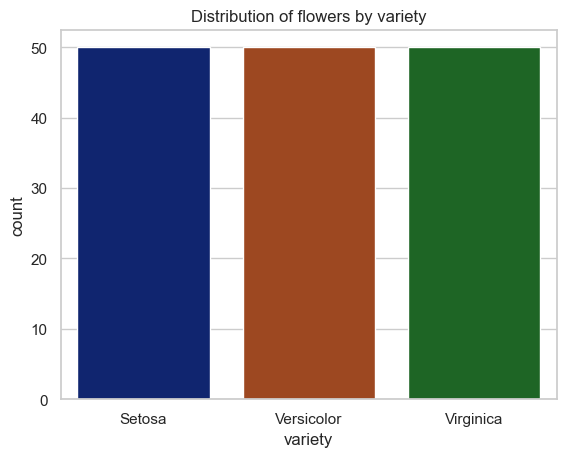

In [13]:
sb.countplot(x='variety', data=iris)
plt.title("Distribution of flowers by variety")
plt.show()

The bar graph represent the count of each type in the 'variety' column of the dataset.

Each bar belongs to a specific variety (Blue = Setosa, Orange = Versicolor and Green = Virginica) on the x-axis, and the bar height represents the number of occurrences of that variety in the dataset.

In [14]:
features = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
sepal = ['sepal.length', 'sepal.width']
petal = ['petal.length', 'petal.width']

"features" : four strings in list represent different measurements related to sepals and petals in the Iris dataset.

Defined two lists sepal and petal to group features related to sepals and petals, respectively, from the Iris dataset.

For organizing the features for further analysis or visualization.

##### Overlayed Histogram

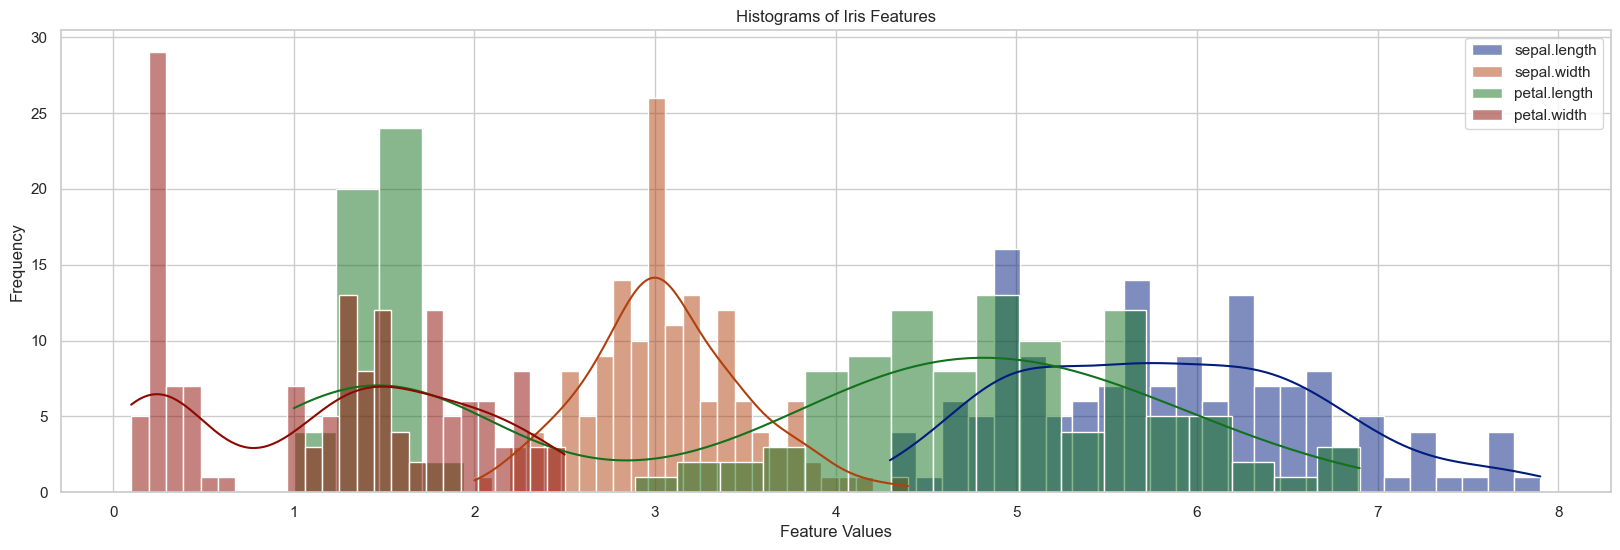

In [15]:
plt.figure(figsize=(20, 6))
for f in features:
    sb.histplot(iris[f], bins=25, label=f, kde=True)

plt.title('Histograms of Iris Features')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The output graph represent the combined histogram (Overlayed Histograms) for each feature in the Iris dataset,  where X-axis represent the feature Values and frequency on y-axis, these provides single view visualisation for distributions of all four features in one histogram

Where below function are used to display this graph :

The "kde=True" adds a Kernel Density Estimation curve to histogram.(The density curves provides perfect representation of distribution probability of the data.)

The "bins=20" decides the number of bins for each feature's histogram. 

The "legend" function is used to lablel the features in a histogram, for clear and quick understanding.


The above graph provides an in-depth view of the distribution of each feature, which  help to identify patterns and variations that may influence the model accuracy.

### Visualization for ('sepal.length', 'sepal.width', 'petal.length', 'petal.width') column data.

##### Histogram 

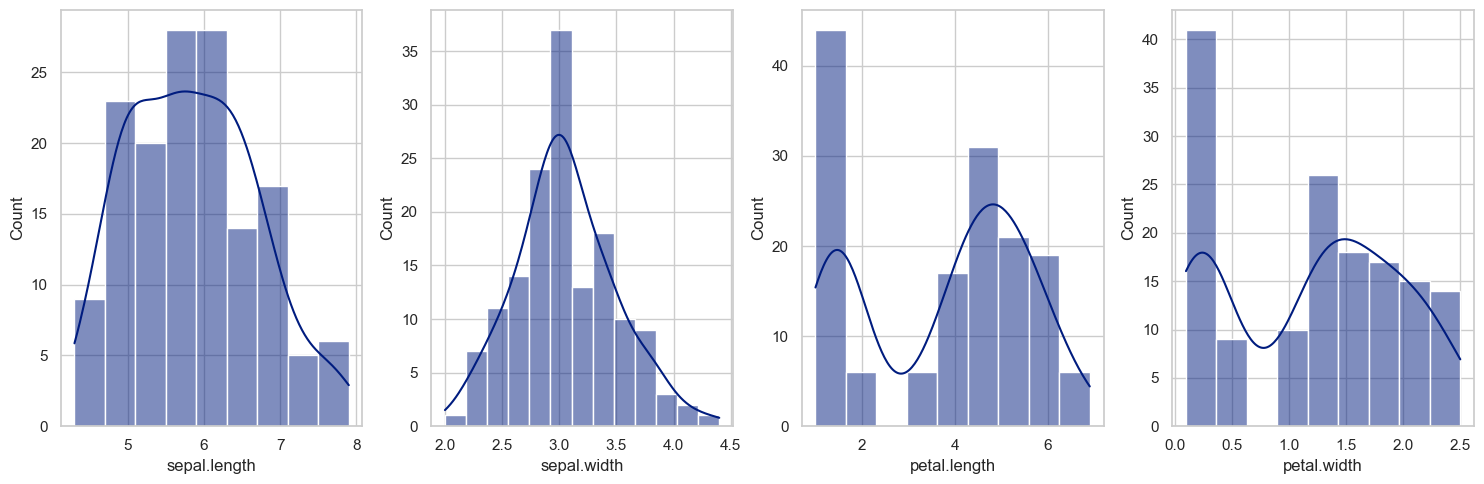

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(15, 5))

#for i, feature in enumerate(f):
for i in range(len(features)):
    sb.histplot(data=iris, x=features[i], ax=axes[i], kde=True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

###### enumerate is a built-in Python function that is used to iterate over a sequence (such as a list, tuple, or string) while keeping track of the index or position of the current element. It returns pairs of index and value.

The output histograms, shows the frequency distribution of input features(sepal length, sepal width, petal length, and petal width) for iris dataset. 

The histograms shows that the features have different shapes, ranges and variability. 

Sepal length and width have unimodal distributions, meaning they have one peak, and

Petal length and width have bimodal distributions, meaning they have two peaks. 

Sepal length and width have larger spreads than petal length and width. This means that the values of sepal length and width are more dispersed around their means than the values of petal length and width.

The different shapes and peaks in histograms, represent that there are different types of flowers data in the data set.

This can be helpful for comparing measurements, features and identify potential relationships or patterns of sepal and petal, for three variety of iris flowers.

###### Box plot

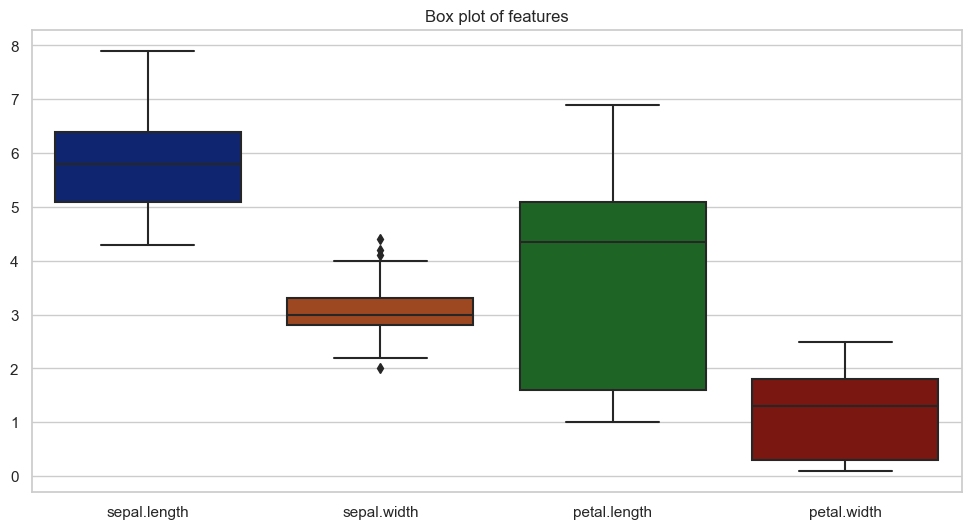

In [17]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=iris)
plt.title('Box plot of features')
plt.show()

A box plot is a standard way to display the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

The box extends from the Q1 to Q3 quartile values of the dataset, while the line in the middle of the box is the median. 

The “whiskers” represent the range of the data, excluding outliers which are plotted as individual points.

From the box plot we get to know that there are some outliners in sepal width data.


##### Violin plot

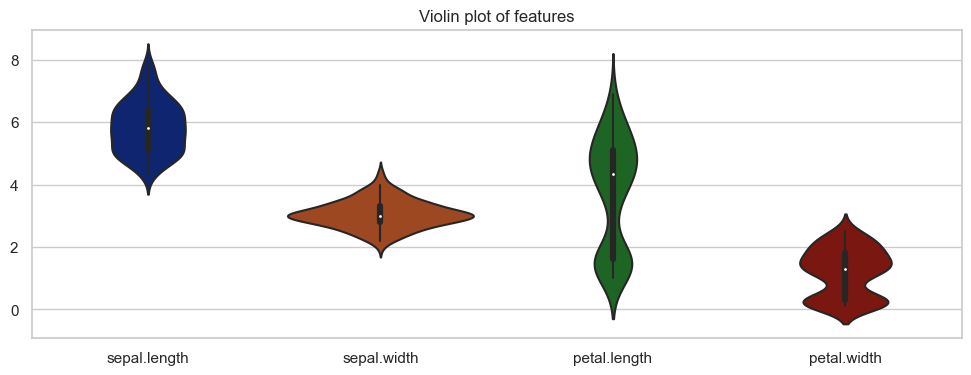

In [18]:
plt.figure(figsize=(12, 4))
sb.violinplot(data=iris)
plt.title('Violin plot of features')
plt.show()

The plot shows that the petal length and width measurements have a wider distribution across the different iris variety compared to the sepal length and width measurements. 

The violin plot is a combination of a boxplot and a kernel density estimate (KDE) plot, which allows for a visual representation of the distribution of the feature values.


### Visualization for ('sepal.length', 'sepal.width', 'petal.length', 'petal.width') columns data, grouped by "variety" column.

In [19]:
groupby_variety = iris.groupby('variety').describe()
pd.set_option('display.max_columns', 32)
groupby_variety

sepal.length                                              \
                  count   mean       std  min    25%  50%  75%  max   
variety                                                               
Setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal.width                                                \
                 count   mean       std  min    25%  50%    75%  max   
variety                                                                
Setosa            50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4   
Versicolor        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
Virginica         50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

           petal.length                                               \
                  count   mean       std  min  25%   50%    75%  max   
variety                                                                
Setosa             50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
Versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
Virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal.width                                            
                 count   mean       std  min  25%  50%  75%  max  
variety                                                           
Setosa            50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
Versicolor        50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Virginica         50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

The output shows the statistical data for numerical columns in the DataFrame, grouped by the unique values in the 'variety' column. This provides proper insights for the distribution and characteristics of the numerical data within each group (setosa, versicolor and virginica).

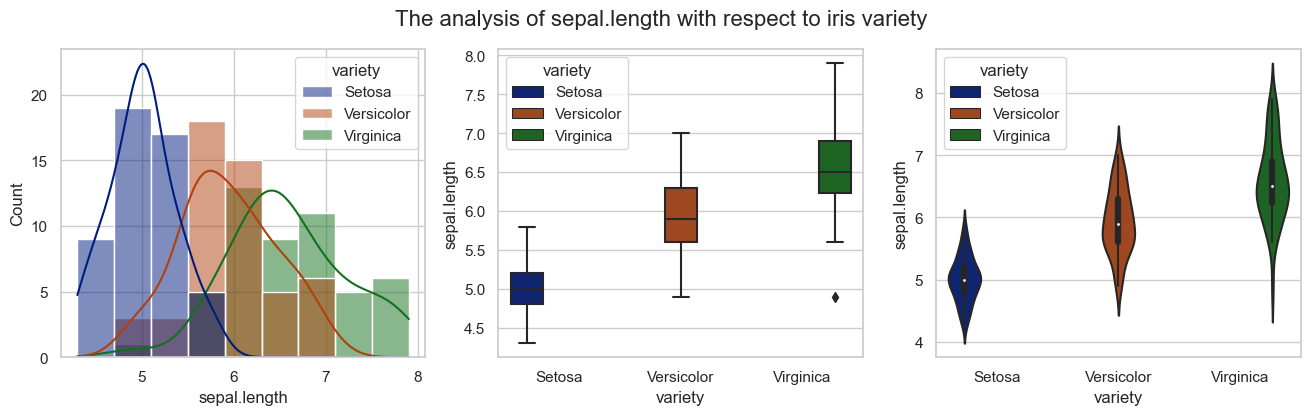

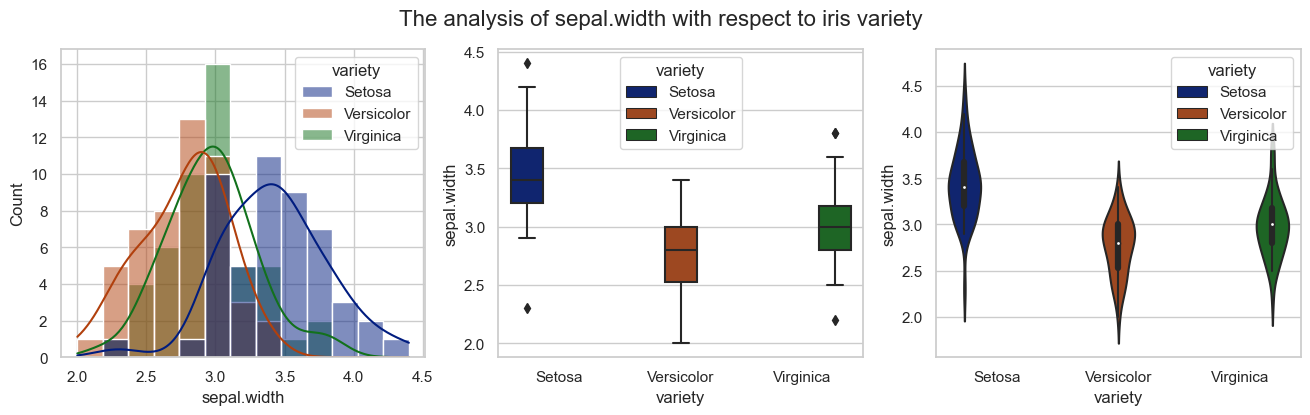

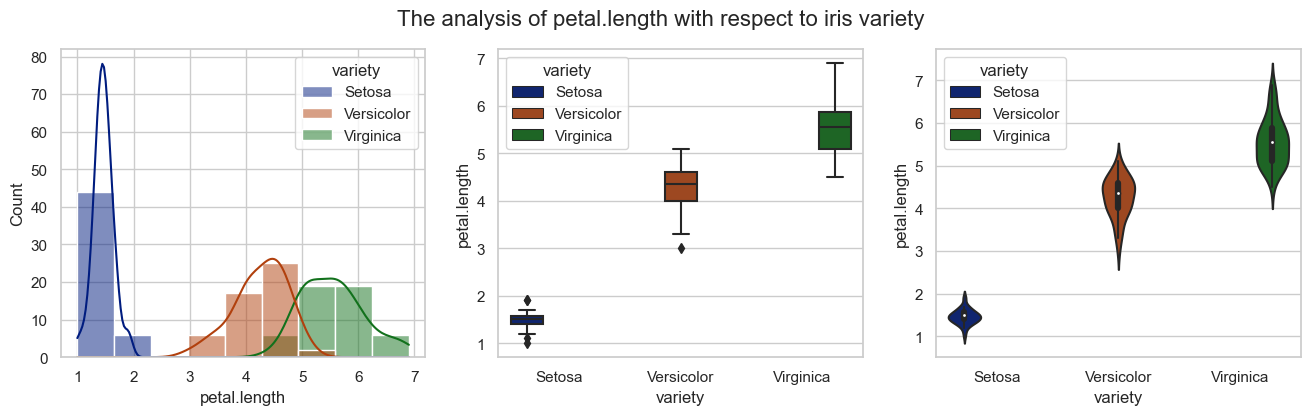

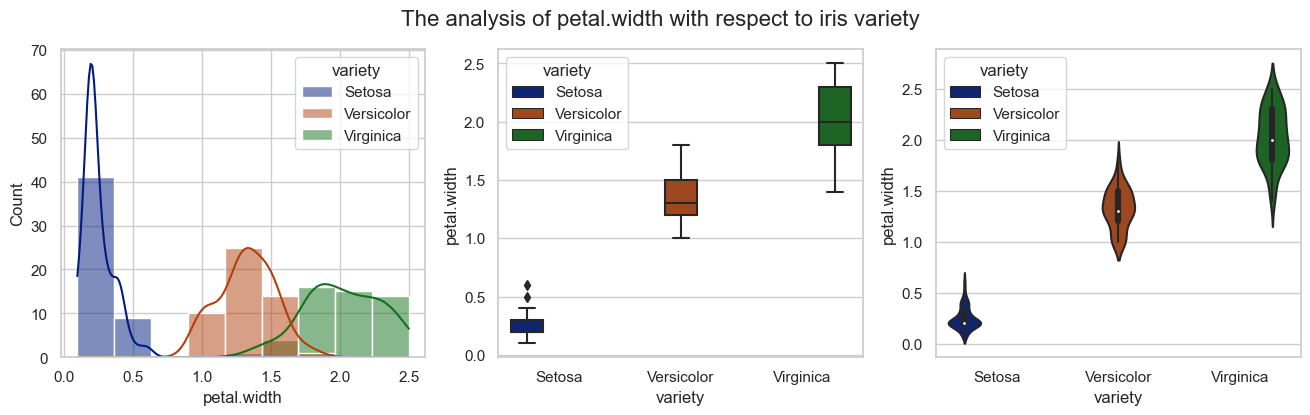

In [20]:
for f in features:
    plt.figure(figsize=(16, 4))
    plt.suptitle(f"The analysis of {f} with respect to iris variety", fontsize=16)
    plt.subplot(1, 3, 1)
    sb.histplot(data=iris, x=f, hue="variety", kde=True) 
    plt.subplot(1, 3, 2)
    sb.boxplot(data=iris, x='variety', y=f, hue = 'variety')
    plt.subplot(1, 3, 3)
    sb.violinplot(data=iris, x="variety", y=f, hue="variety")

plt.show()   

Histograms show the frequency distribution of each feature for each variety. The higher the bars, the more flowers have that value for that feature. The overlapping areas show the common values shared by different varieties.

Box plots show the summary statistics of each feature for each variety. The box represents the interquartile range (IQR) also the middle value of the data. The whiskers extend to the minimum and maximum values, excluding outliers. 

The outliers are the dots that are far away from the box and whiskers. They are the values that are unusually high or low compared to the rest of the data. Here our dataset is small so i am ignoring the outliers.

Violin plots combine the aspects of box plots and kernel density estimation. They show the shape of the data distribution for each feature and each variety. The thicker the violin, the higher the density of the data. The thin line inside the violin is the box plot.

The output graphs represent the sepal length, sepal width, petal length, and petal width of each variety using histograms, box plots, and violin plots.

From the output, we can observe the following:

Setosa generally has smaller dimensions than Versicolor and Virginica, especially for petal length and petal width.
There is a clear separation between Setosa and the other two varieties in terms of petal length and petal width, which means these features can be used to distinguish Setosa from the others.
Sepal length and sepal width show some overlap between all three varieties, which means these features are not very useful to classify the varieties.
Outliers are present in sepal width for all three varieties, which indicates that there is some variation within each variety.
Median lines in box plots indicate the central tendency of each feature for each variety, which aligns with the observations from histograms.

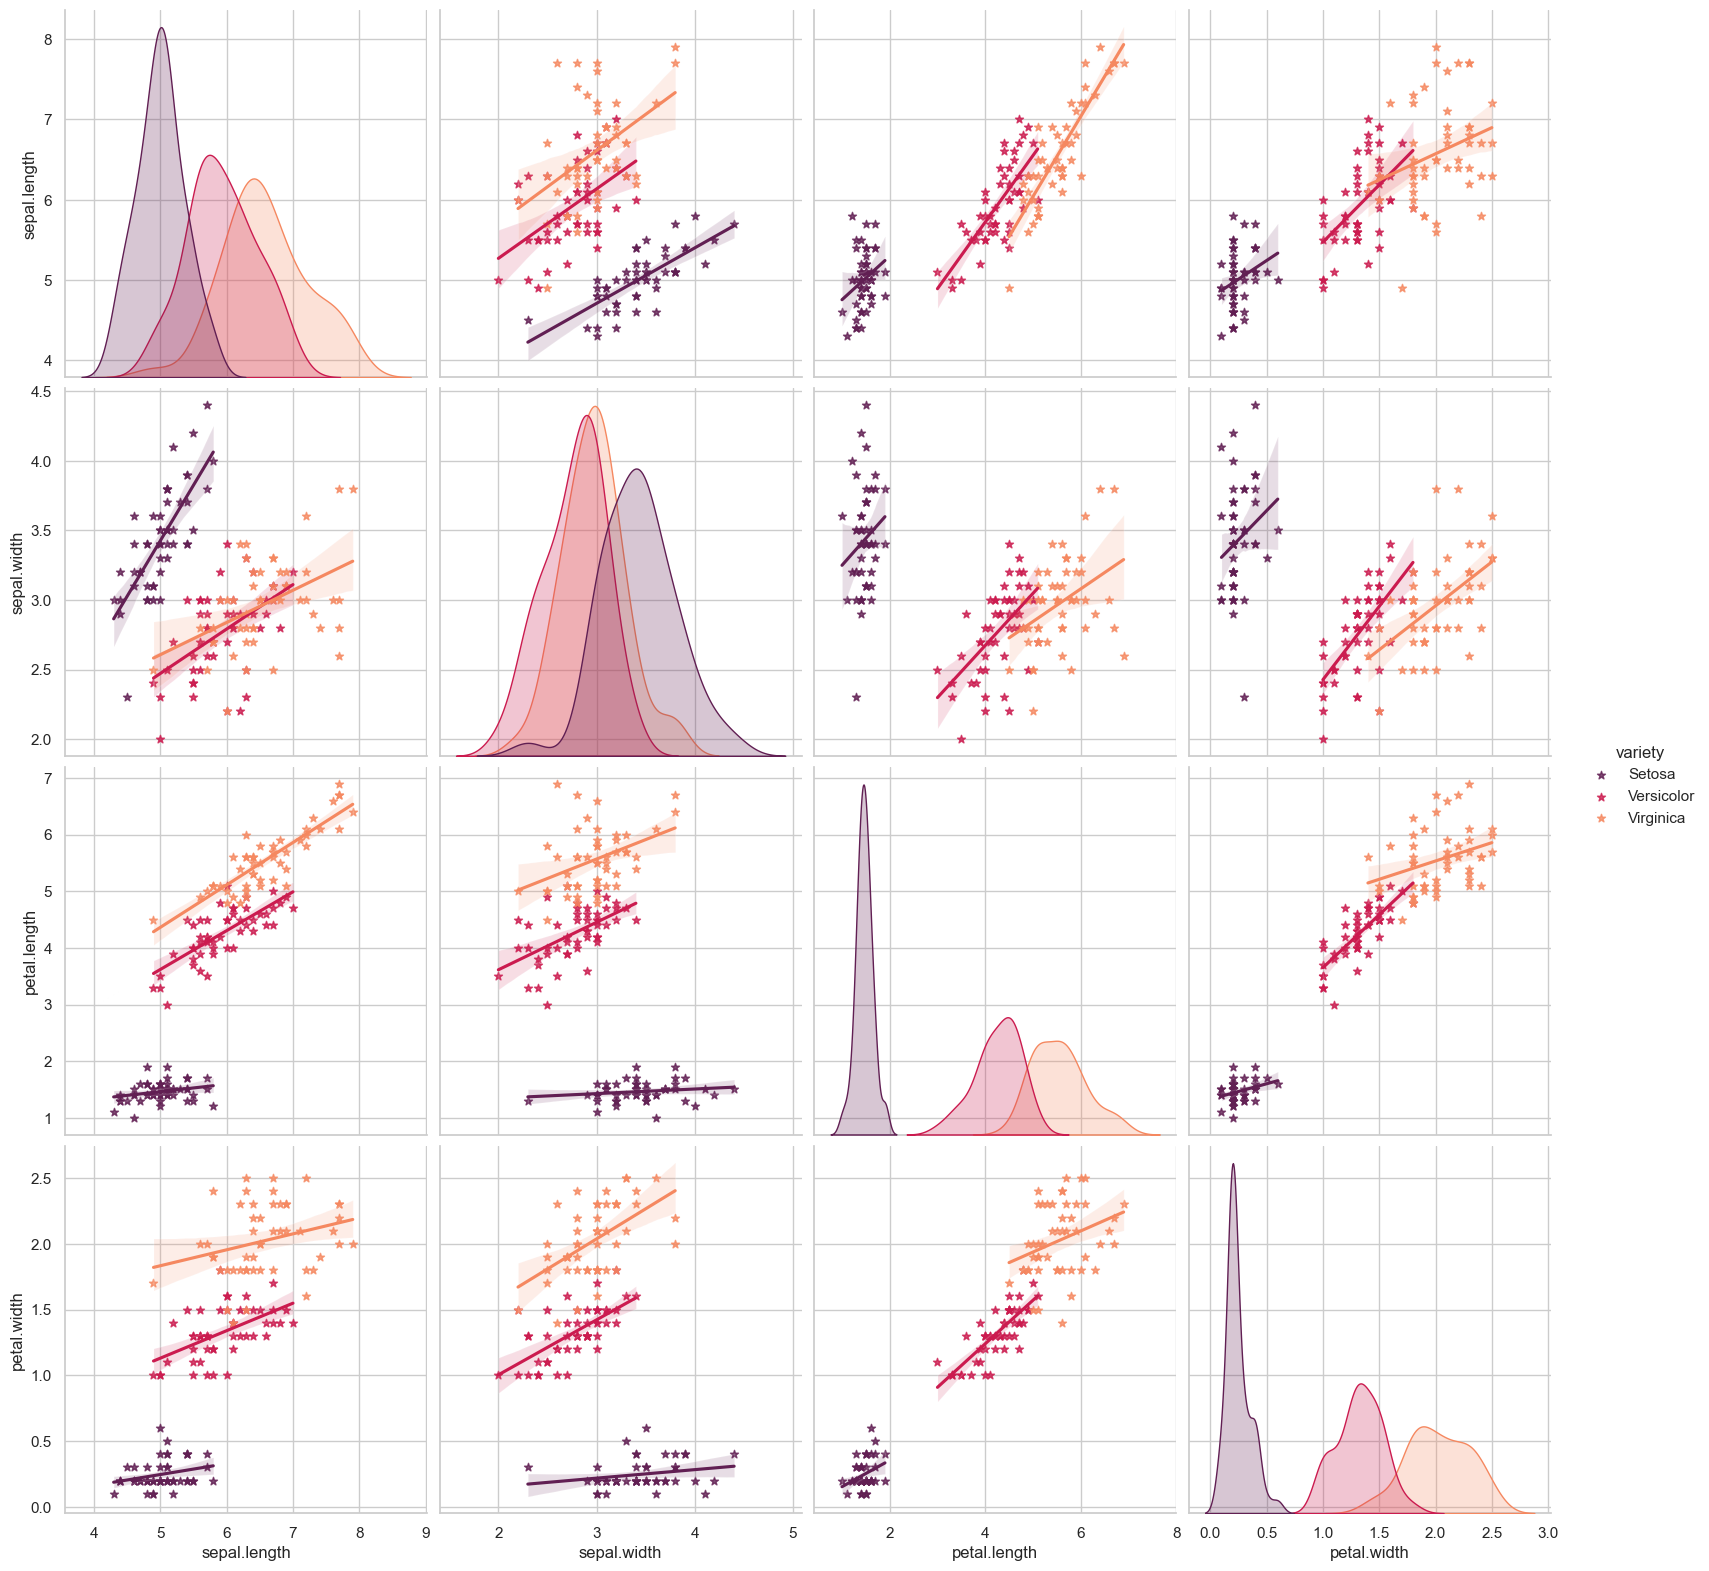

In [21]:
sb.pairplot(iris, hue='variety', kind="reg", markers='*', palette="rocket", height = 4, diag_kind="kde", )

The output display a grid of scatterplots, and density plots. Each scatterplot represents the relationship between two variables, and the diagonal show kernel density estimates (KDE) for each variable.

The line in the scatterplot is "Line of best fit"

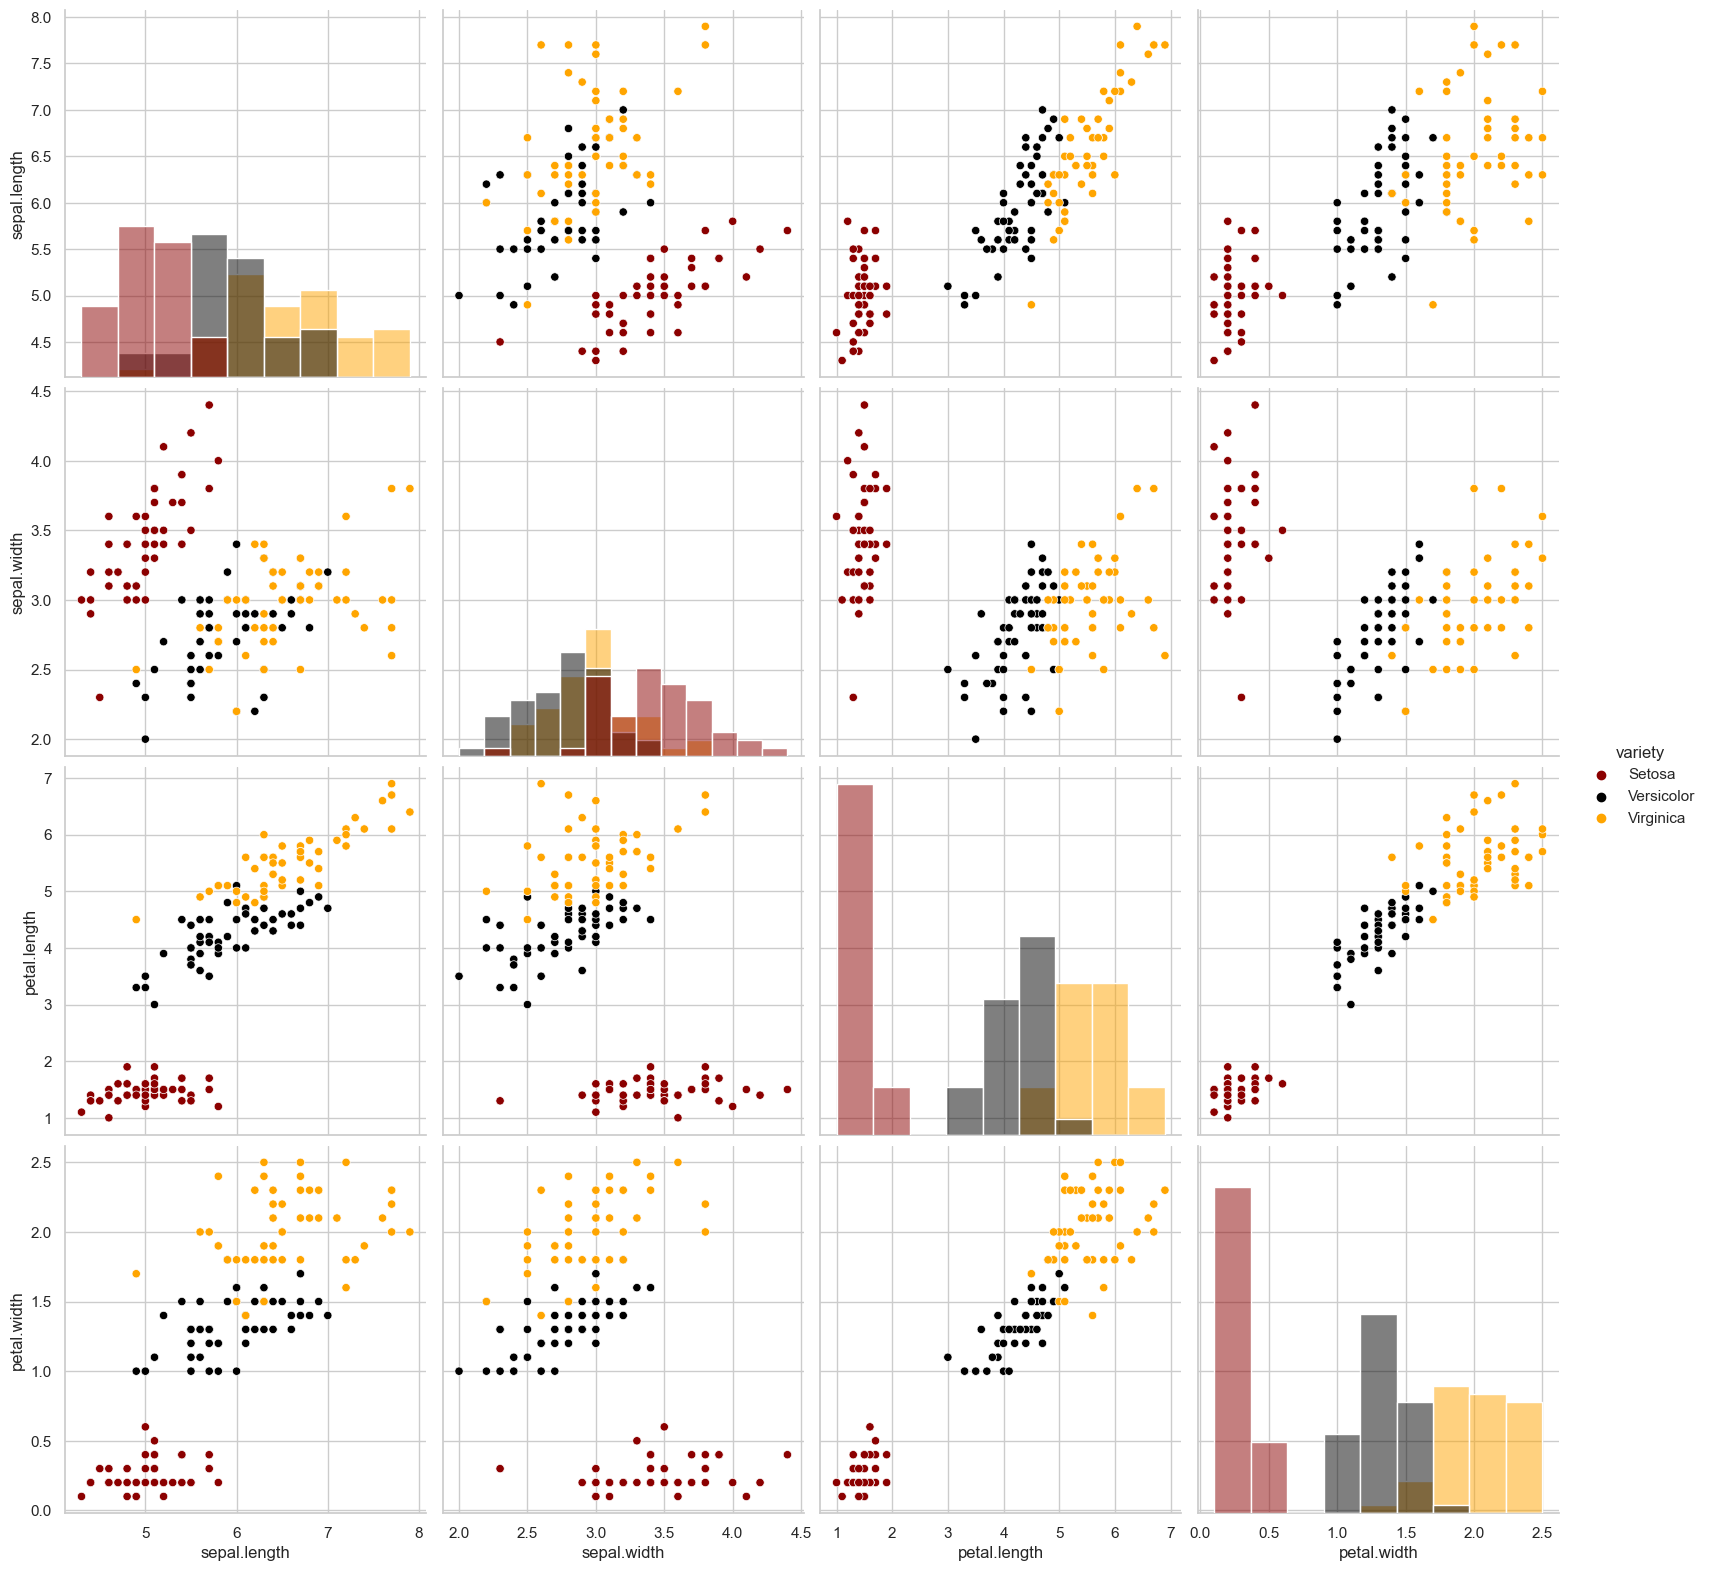

In [22]:
custom_palette = ["darkred", "black", "orange"]
sb.pairplot(iris, hue='variety', palette=custom_palette, diag_kind="hist", height=4)
plt.show()

The output display a grid of scatterplots, and histogram. Each scatterplot represents the relationship between two variables, and the diagonal show histogrm for each variable.

#### Individual distribution of the data by the variety using the "facegrid" function

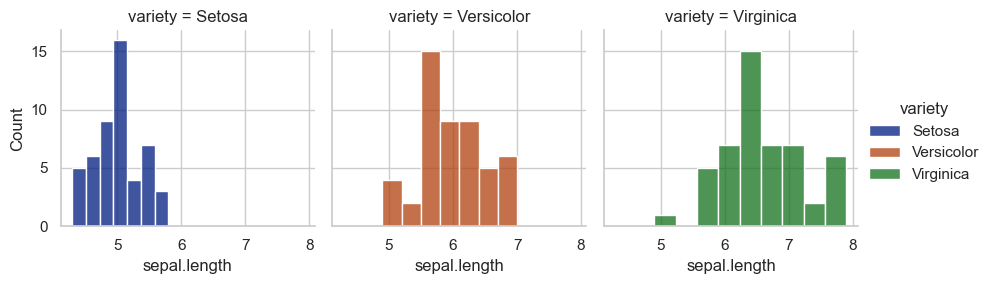

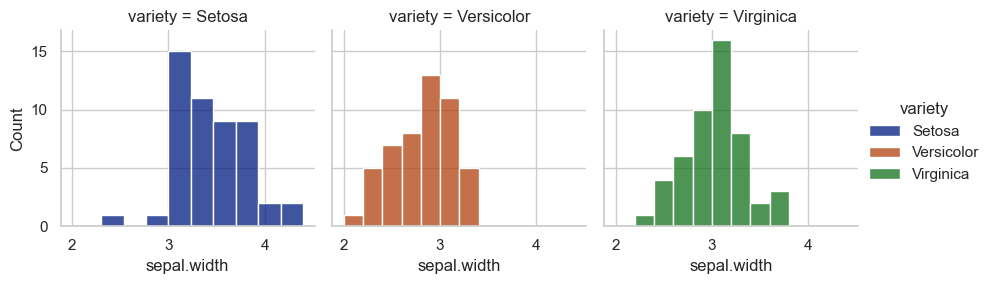

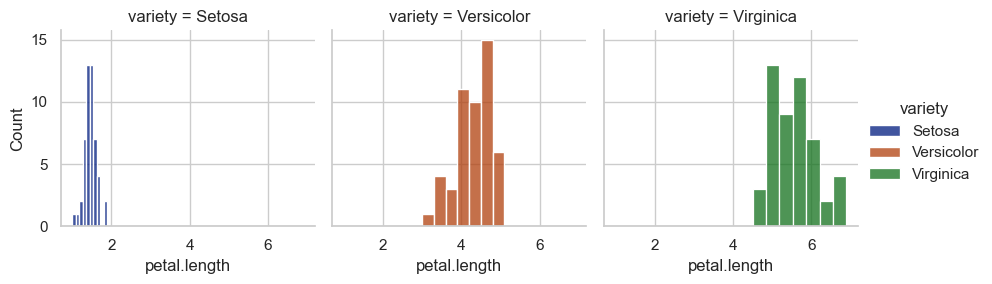

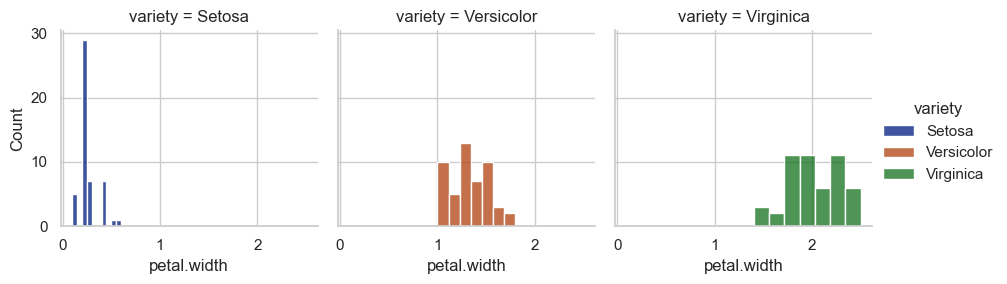

In [23]:
for f in features:
    plot = sb.FacetGrid(iris, col="variety", hue = 'variety' , )
    plot.map(sb.histplot, f).add_legend()
plt.show()

###### Correlation matrix 
The number of features and their correlation playes a important role for training any algorithm. 

Training an algorithm with all the featues will reduce the accuracy when many of the features in dataset are highly correlated. In such cases features selection for training should be done carefully.

This iris dataset has less featues but still check the correlation.

1. Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

2. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000


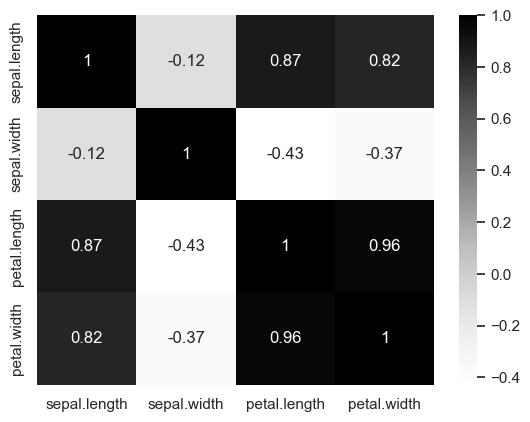

In [24]:
numeric_columns = iris.select_dtypes(include=[float, int]).columns
correlation_matrix = iris[numeric_columns].corr()

print(correlation_matrix)

sb.heatmap(correlation_matrix, cmap='Greys',annot = True);
 
plt.show()

The output is a heatmap visualization for features. Each cell in the heatmap represents the correlation coefficient between two variables. 

The values range from -1 to 1, where:

1 indicates a perfect positive correlation, also (values closer to 1)  which are usually represented by lighter shades or colors in the heatmap. Lighter colors signify a strong positive correlation between variables. For example, when one variable increases, the other tends to increase as well.

-1 indicates a perfect negative correlation, also (values closer to -1) are typically represented by darker shades or colors in the heatmap. Darker colors indicate a strong negative correlation between variables. In this case, when one variable increases, the other tends to decrease.

0 indicates no correlation.


## Mapping function to Encode the target variable ie convert it to numeric type:

In [6]:
name_mapping = {'Setosa':1,'Versicolor':2, 'Virginica':3}
iris["variety"]=iris['variety'].map(name_mapping)

###### Here the Target variable column is "variety" in our dataset. 
In above code line 1 creates a dictionary with variable name as "name_mapping" so we can map the "variety" column the target variable to numeric type. 
Line 2 - this line is mapping the "variety" column of iris data frame. 

".map" - function is used to replace the all values of "variety" column by taking reference from "name_mapping" dict. So, the column will have numerical values (0, 1, and 2) instead of the original string labels ('Setosa', 'Versicolor', 'Virginica')

You can see that in above output representation of data frame.


### Created two variables X and Y.

In [7]:
X = iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
Y = iris[['variety']].values

###### Here what is X and Y?

This code extracts feature and target variables from the iris DataFrame and creates a feature matrix X by selecting specific columns ('sepal.length', 'sepal.width', 'petal.length', 'petal.width') from the iris DataFrame.

Simillary creates a target variable Y by selecting the 'variety' column from the iris DataFrame.

(.values) function converts the selected column into a NumPy array.

"In short, X represents the input features (sepal and petal measurements), and Y represents the target variable (variety of flower) for further use in machine learning models."

### Defined two lists:
1. models - which contains algorithms, and there name.
2. parameters - contains the set of parameters require for finding hyperparameter for algorithms.


In [8]:
models = [
    ("Logistic Regression : ", LogisticRegression()),
    ("Support Vector Machine : ", SVC()),
    ("Random Forest Classifier : ", RandomForestClassifier())
]

parameters = [
    {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 
     'solver': ['liblinear', 'lbfgs', 'sag', 'saga'], 'max_iter': [10, 50, 100, 150, 200]}, 
              
    {'C': [0.01, 0.1, 1, 10], 'kernel': ['poly', 'linear', 'rbf', 'sigmoid'], 
     'degree': [2, 3, 4], 'gamma': [0.01, 0.1, 'scale', 'auto'], 'decision_function_shape': ['ovo', 'ovr']}, 
              
    {'n_estimators': [10, 50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [1, 4, 9],
     'min_samples_leaf': [3, 5, 8], 'max_features': ['auto', 'sqrt', 'log2']}
]

# 2. Implimenting KFold cross valiadation method

In [170]:
cv_scores = []
print("Model Evaluation using KFold", '\n', "."*110)
print("Algorithm".ljust(30), "Mean Cross validation Score".ljust(35), "standard deviation Cross validation Score", '\n')

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for n, model in models:

    for train_index, val_index in kf.split(X):
        x_train, x_val = X[train_index], X[val_index]
        y_train, y_val = Y[train_index], Y[val_index]
        model.fit(x_train, y_train)
        val_score = model.score(x_val, y_val)

        cv_scores.append(val_score)
        
    mean_cv_score = np.mean(cv_scores)*100
    std_cv_score = np.std(cv_scores)
    
    print(f"{n}".ljust(35),  str(mean_cv_score).ljust(35), str(std_cv_score))
        
print("--" * 57, '\n')


Model Evaluation using KFold 
 ..............................................................................................................
Algorithm                      Mean Cross validation Score         standard deviation Cross validation Score 

Logistic Regression :               97.33333333333334                   0.024944382578492935
Support Vector Machine :            97.00000000000001                   0.02768874620972691
Random Forest Classifier :          96.66666666666669                   0.02721655269759086
------------------------------------------------------------------------------------------------------------------ 



# 3. Implement Grid Search CV to find optimal hyperparameters for any 3 algorithms(out of LR, SVM, MLP, RF, Boosting):

In these project i have use :

1. Logistic Regression : 
2. Support Vector Machine :
3. Random Forest Classifier



###### Steps : 
1. Here we have perform hyperparameter tuning for three different models using "Grid search Cv" to obtain the best parameters and best estimator.

2. Train the model with best parameters to evalute the model on validation and testing dataset.

3. Perform the evaluation on two different data split ratios (60,20,20), (80,10,10).

4. Evaluation done through confusion metrix, classification report and calculating the accuracy.



## Implementing Grid Search CV to find optimal hyperparameters .

Function "gscv_best_params" is to provide the best parameters, estimator and score.

In [2]:
def gscv_best_params(X, Y, ratios, models, parameters, CV, random_state = 67):
    splits = []
    gscv_list = []
    best_est = []
    best_parameters = []
    for train_ratio, val_ratio, test_ratio in ratios:
        X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=((val_ratio + test_ratio)/100), random_state=random_state, stratify=Y)
        X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=random_state, stratify=Y_temp)

        print("For Split Ratio".ljust(20), "Values".ljust(10), "Train Shape".ljust(20), "Valid Shape".ljust(20), "Test Shape")
        print(f"({train_ratio}, {val_ratio}, {test_ratio})".ljust(20), 'X'.ljust(10), str(X_train.shape).ljust(20), str(X_valid.shape).ljust(20), str(X_test.shape))
        print("".ljust(20), 'Y'.ljust(10), str(Y_train.shape).ljust(20), str(Y_valid.shape).ljust(20), str(Y_test.shape))
        print("-" * 80, '\n')
        
        print("Result for Grid Search CV which provide the best socre, latency and best parameters", '\n')
        print("Algorithm".ljust(35), "Latency".ljust(20), "Best Score".ljust(20), '\n')
        splits.append((X_train, X_valid, X_test, Y_train, Y_valid, Y_test))
        
        for (name, model), params in zip(models, parameters):
            #print(f"Training {name}...")
            gscv = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=CV, return_train_score=True)
            
            start_time = time.time()
            gscv.fit(X_train, Y_train)
            latency = time.time() - start_time
        
            #best_par = gscv.best_params_
            
            #print("Best estimator : ".ljust(20), gscv.best_estimator_, '\n')
            
            print(f"{name}".ljust(35),  str(round(latency, 4)).ljust(20), str(round((gscv.best_score_) * 100, 4)).ljust(20))
            print(f"Best parameters : ".ljust(35),  str(gscv.best_params_))
            best_parameters.append(gscv.best_params_)
            
            gscv_list.append(gscv)
            
            best_est.append(gscv.best_estimator_)
            
        print('\n', "="*90, '\n')
        
        
    return best_parameters, best_est

### Below code is for analyzing the output for the  defined "gscv_best_params" function.

## Model evaluation on validation dataset

In [3]:
def final_model_evaluation_val(X_train, Y_train, X_valid, Y_valid, models, best_est):
    val_expected = []
    val_predictions = []
    print("Model evaluation on validation dataset", "\n")
    
    print("Algorithm".ljust(35), "Latency".ljust(20), "Accuracy".ljust(20), "Recall".ljust(20), "Precision")
    
    for (name, a), estimator in zip(models, best_est):


        start_time = time.time()   
        Final_model = estimator.fit(X_train, Y_train)
        latency = time.time() - start_time    
        
        prediction = Final_model.predict(X_valid)
        expected = Y_valid
            
        val_expected.append(expected)
        val_predictions.append(prediction)
            
        precision = precision_score(expected, prediction, average='weighted')*100
    
        recall = recall_score(expected, prediction, average='weighted')*100
    
        accuracy = accuracy_score(expected, prediction)*100

        print(f"{name}".ljust(35),  str(round(latency, 6)).ljust(20), str(round(accuracy, 6)).ljust(20), 
              str(round(recall, 6)).ljust(20),str(round(precision, 6)))
        
    print("-*-" * 38, '\n')     
            
    return val_expected, val_predictions 

### Below code is for analyzing the output for the  defined "final_model_evaluation_val" function.

## Model evaluation on testing dataset


In [4]:
def final_model_evaluation_test(X_train, Y_train, X_test, Y_test, models, best_est):
    train_expected = []
    train_predictions = []
    print("Model evaluation on Training dataset", "\n")
    
    print("Algorithm".ljust(35), "Latency".ljust(20), "Accuracy".ljust(20), "Recall".ljust(20), "Precision")
    for (name, algo), estimator in zip(models, best_est):
        
        Final_model = estimator

        start_time = time.time()   
        Final_model.fit(X_train, Y_train)
        latency = time.time() - start_time    
        
        prediction = Final_model.predict(X_test)
        expected = Y_test
            
        train_expected.append(expected)
        train_predictions.append(prediction)
            
        precision = precision_score(expected, prediction, average='weighted')*100
    
        recall = recall_score(expected, prediction, average='weighted')*100
    
        accuracy = accuracy_score(expected, prediction)*100

        prin### Below code is for analysing the output for the  defined "final_model_evaluation_val" function.t(f"{name}".ljust(35),  str(round(latency, 6)).ljust(20), str(round(accuracy, 6)).ljust(20), 
              str(round(recall, 6)).ljust(20),str(round(precision, 6)))
        
    print("-*-" * 38, '\n')     
            
    return train_expected, train_predictions

### Below code is for analyzing the output for the  defined "final_model_evaluation_test" function.

# Main function to call all defined function in one 

In [5]:
def main(X, Y, ratios, models, parameters, CV, random_state = 67):
    
    best_parameters, best_est = gscv_best_params(X, Y, ratios, models, parameters, CV, random_state = 67)
    for train_ratio, val_ratio, test_ratio in ratios:
        X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=((val_ratio + test_ratio)/100), random_state=random_state, stratify=Y)
        X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=random_state, stratify=Y_temp)
    
    expected_valid, predicted_valid = final_model_evaluation_val(X_train, Y_train, X_valid, Y_valid, models, best_est)

    for i, (expected_val, predicted_val, algo_name) in enumerate(zip(expected_valid, predicted_valid, models)):
        print("Classification and confusion  Metrics for ", str(algo_name[0],))
        print(classification_report(expected_val, predicted_val))
    
        con_metrics_val = metrics.confusion_matrix(expected_val, predicted_val)
        plt.figure(figsize=(4, 3))
        sb.heatmap(con_metrics_val, annot=True, cmap="Greys", fmt="d", xticklabels=True, yticklabels=True)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()

    print("="*110, '\n')

    expected_train, predicted_train = final_model_evaluation_test(X_train, Y_train, X_test, Y_test, models, best_est)


    for i, (expected_train, predicted_train, algo_name) in enumerate(zip(expected_train, predicted_train, models)):
        print("Classification and confusion Metrics for  ", str(algo_name[0],))
        print(classification_report(expected_train, predicted_train))
    
        con_metrics_train = metrics.confusion_matrix(expected_train, predicted_train)
        plt.figure(figsize=(4, 3))
        sb.heatmap(con_metrics_train, annot=True, cmap="Greys", fmt="d", xticklabels=True, yticklabels=True)
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()
    
    return


# Models evaluation on (60,20,20) dataset : 

1. ratios - contain the ratio for splitting dataset into (60,20,20) train, validation, and test sets:
2. CV - contains number of desired cross validation folds.
3. "main(X, Y, ratios, models, parameters, CV, random_state = 67)" calls the defined finction main.

For Split Ratio      Values     Train Shape          Valid Shape          Test Shape
(60, 20, 20)         X          (90, 4)              (30, 4)              (30, 4)
                     Y          (90, 1)              (30, 1)              (30, 1)
-------------------------------------------------------------------------------- 

Result for Grid Search CV which provide the best socre, latency and best parameters 

Algorithm                           Latency              Best Score           

Logistic Regression :               1.725                98.9011             
Best parameters :                   {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'sag'}
Support Vector Machine :            2.0129               97.8022             
Best parameters :                   {'C': 1, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Random Forest Classifier :          28.0612              97.8022             
Best parameters :                   {'max_dept

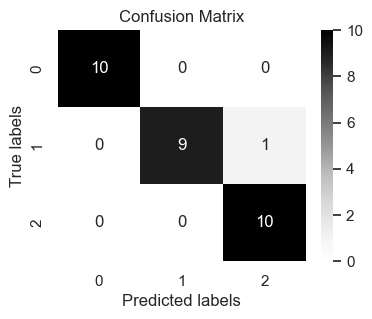

Classification and confusion  Metrics for  Support Vector Machine : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.90      0.95        10
           3       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



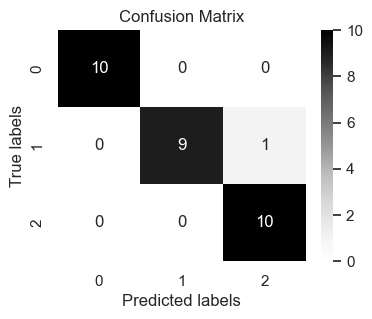

Classification and confusion  Metrics for  Random Forest Classifier : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.90      0.90      0.90        10
           3       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



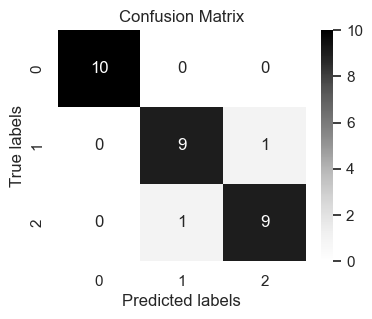


Model evaluation on Training dataset 

Algorithm                           Latency              Accuracy             Recall               Precision
Logistic Regression :               0.002323             100.0                100.0                100.0
Support Vector Machine :            0.0003               100.0                100.0                100.0
Random Forest Classifier :          0.003866             96.666667            96.666667            96.969697
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Classification and confusion Metrics for   Logistic Regression : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00

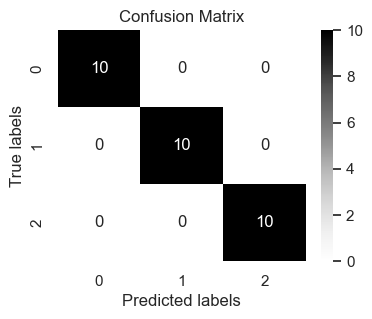

Classification and confusion Metrics for   Support Vector Machine : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



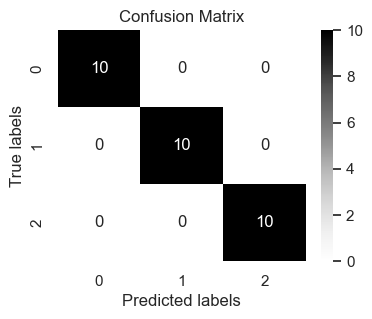

Classification and confusion Metrics for   Random Forest Classifier : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10
           3       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



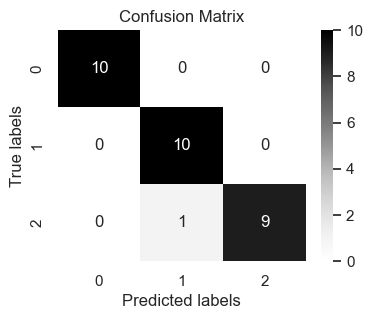

In [9]:
ratios = [(60,20,20)]
CV = 7
main(X, Y, ratios, models, parameters, CV, random_state = 67)

# Models evaluation on (80,10,10) dataset : 

For Split Ratio      Values     Train Shape          Valid Shape          Test Shape
(80, 10, 10)         X          (120, 4)             (15, 4)              (15, 4)
                     Y          (120, 1)             (15, 1)              (15, 1)
-------------------------------------------------------------------------------- 

Result for Grid Search CV which provide the best socre, latency and best parameters 

Algorithm                           Latency              Best Score           

Logistic Regression :               2.0255               99.1597             
Best parameters :                   {'C': 1, 'max_iter': 150, 'penalty': 'l2', 'solver': 'sag'}
Support Vector Machine :            2.3928               99.1597             
Best parameters :                   {'C': 0.1, 'decision_function_shape': 'ovo', 'degree': 4, 'gamma': 0.1, 'kernel': 'poly'}
Random Forest Classifier :          28.2089              97.5257             
Best parameters :                   {'max_dept

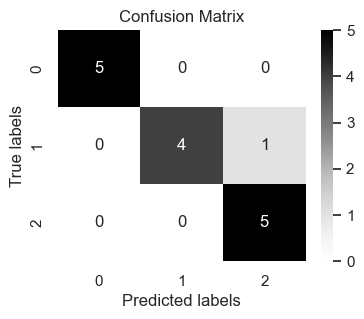

Classification and confusion  Metrics for  Support Vector Machine : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.80      0.80      0.80         5
           3       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15



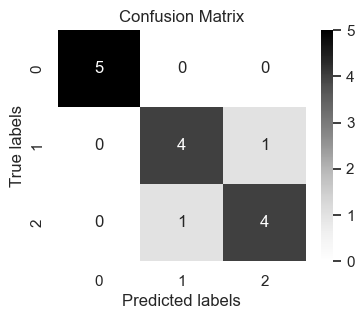

Classification and confusion  Metrics for  Random Forest Classifier : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.80      0.80      0.80         5
           3       0.80      0.80      0.80         5

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15



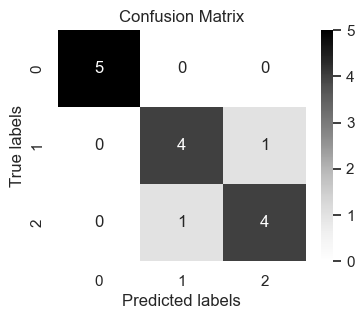


Model evaluation on Training dataset 

Algorithm                           Latency              Accuracy             Recall               Precision
Logistic Regression :               0.002262             93.333333            93.333333            94.444444
Support Vector Machine :            0.000295             93.333333            93.333333            94.444444
Random Forest Classifier :          0.003829             93.333333            93.333333            94.444444
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Classification and confusion Metrics for   Logistic Regression : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg   

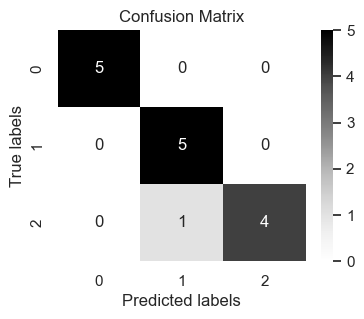

Classification and confusion Metrics for   Support Vector Machine : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



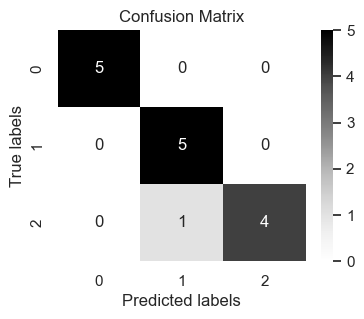

Classification and confusion Metrics for   Random Forest Classifier : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
           3       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



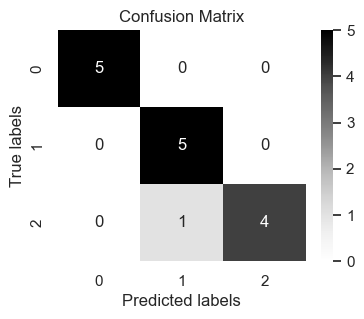

In [10]:
ratios = [(80,10,10)]
CV = 7
main(X, Y, ratios, models, parameters, CV, random_state = 67)

# 4. Analyze the results on the validation set and test set and mention which model performed the best and why?

#  5. What was the best proportion from the set of experiments you conducted?